Lambda School Data Science

*Unit 1, Sprint 1, Module 4*

---

# Make Explanatory Visualizations

### Objectives

- Student can identify the appropriate visualization type for a particular variable type and research question 
- Student can use Matplotlib to visualize distributions and relationships with continuous and discrete variables
- Student can add emphasis and annotations to transform visualizations from exploratory to explanatory
- Student can remove clutter from visualizations
- Student can identify misleading visualizations and how to fix them



# Tried and true visualizations

###For categorical variables

- Bar plots for a single categorical variable
- Side-by-side or stacked bar plots when you want to compare one categorical variable grouped by another categorical variable
- Pie charts when there are only a few categories that add to 100% (caveat emptor - we we will see lots of examples of misused pie charts later)

###For quantitative variables
- Histograms for a single quantitative variable
- Box plots for a single quantitative variable
- Time plots
- Line plots
- Scatterplots for displaying the relationship between two quantitative variables



###We will discuss boxplots, side-by-side bar plots and scatterplots in later projects.

### A couple cool plots that are "hot" right now: 

- [Sankey diagrams](https://en.wikipedia.org/wiki/Sankey_diagram)
- [Violin plots](https://en.wikipedia.org/wiki/Violin_plot#:~:text=A%20violin%20plot%20is%20a,by%20a%20kernel%20density%20estimator.)

Let's work with some easy data and just focus on different kinds of plots.

In [ ]:

import pandas as pd

# Load the Titanic dataset from its URL:
Titanic = pd.read_csv('https://raw.githubusercontent.com/LambdaSchool/data-science-practice-datasets/main/unit_1/Titanic/Titanic.csv')

Titanic.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses_Aboard,Parents/Children_Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


###Let's start with histograms. 

We can use a histogram to answer the questions "How old was the "typical" Titanic passneger?" and  "What was the age range of Titanic passengers?"



(array([ 63.,  51., 242., 211., 142.,  88.,  49.,  28.,  11.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <a list of 10 Patch objects>)

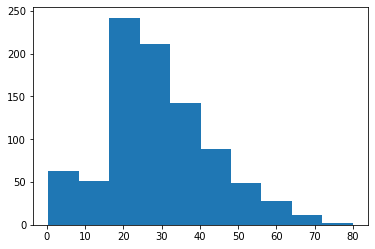

In [ ]:
import matplotlib.pyplot as plt

plt.hist(Titanic['Age'])

Not too bad!  But it would definitely help to assign some axis titles

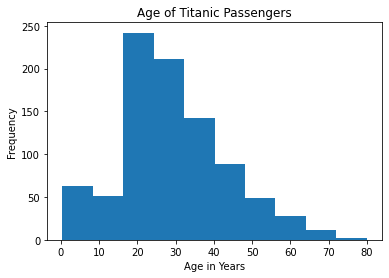

In [ ]:
plt.hist(Titanic['Age'])

plt.xlabel('Age in Years')
plt.ylabel('Frequency')
plt.title(r'Age of Titanic Passengers')

plt.show()

We can see that most Titanic passengers were in their 20s and 30s.  There's also a small bump between for passengers less than 10 years old.  Why do you think that is?

###We can also look at a histogram of the age of titanic passengers by sex to see if there was a difference in age between male and female passengers.  

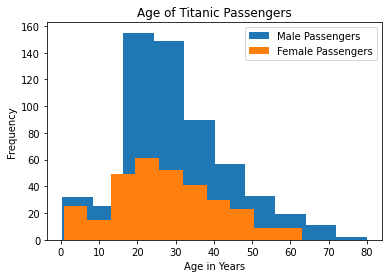

In [ ]:
Titanic_Male = Titanic[Titanic['Sex'] == 'male']
Titanic_Female = Titanic[Titanic['Sex'] == 'female']

plt.hist(Titanic_Male['Age'],label='Male Passengers')
plt.hist(Titanic_Female['Age'],label='Female Passengers')

plt.xlabel('Age in Years')
plt.ylabel('Frequency')
plt.title(r'Age of Titanic Passengers')
plt.legend(loc='upper right')

plt.show()

We can see the same age pattern for male and female passengers, but there were many more male passengers than female passengers.  Let's explore that more.

###Let's make a bar plot to show the frequency of male and female passengers.

In [ ]:
#A bar plot expects the data to be entered in summary or wide form
print(pd.crosstab(index=Titanic["Sex"], columns="count"))


col_0   count
Sex          
female    314
male      573


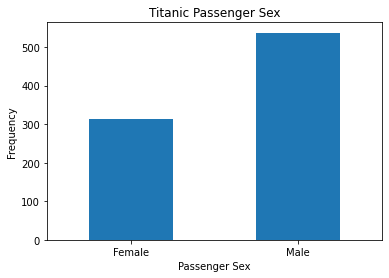

In [ ]:
#A bar plot expects the data to be entered in summary or wide form
#With x-lables and y value heights

df = pd.DataFrame({'lab':['Female', 'Male'], 'val':[314, 537]})
ax = df.plot.bar(x='lab', y='val', rot=0)

plt.xlabel('Passenger Sex')
plt.ylabel('Frequency')
plt.title(r'Titanic Passenger Sex')

#Remove the legend because it doesn't give us any information
ax.get_legend().remove()

plt.show()

###And now for the much-maligned pie chart. We'll display the relative frequency of survivors and those who did not survive. 

Pie charts aren't that bad when used appropriately.

In [ ]:
#A pie chart expects the data to be entered in summary or wide form
print(pd.crosstab(index=Titanic["Survived"], columns="count"))

col_0     count
Survived       
0           545
1           342


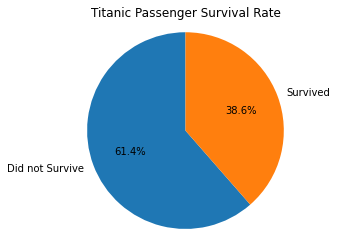

In [ ]:


# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Did not Survive', 'Survived'
sizes = [545, 342]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title(r'Titanic Passenger Survival Rate')
plt.show()

## Figure, Axes Syntax for increasing fanciness.

Let's make a line graph showing survival by passenger sex.  We'll need more summary data.

In [ ]:
print(pd.crosstab(Titanic["Survived"], Titanic['Sex']))

Sex       female  male
Survived              
0             81   464
1            233   109


In [ ]:


df = pd.DataFrame({'Male':[464,109], 'Female': [81,233]})

df.head()

,Male,Female
0,464,81
1,109,233


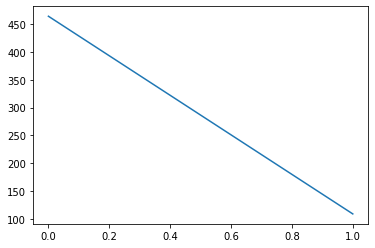

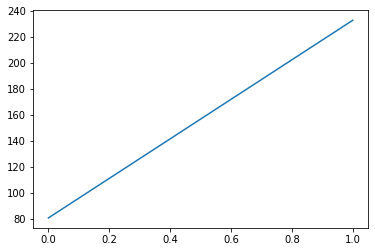

In [ ]:
df['Male'].plot()
plt.show()
df['Female'].plot()
plt.show()

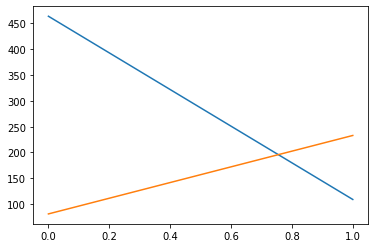

In [ ]:
df['Male'].plot()
df['Female'].plot()
plt.show()

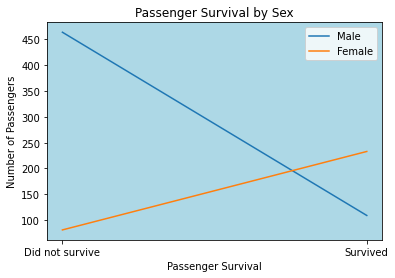

In [ ]:
fig, ax = plt.subplots() 

# everything is done to either our "fig", or "ax" variables

#You could change this if you wanted to...
fig.set_facecolor('white')


my_xticks = ['Did not survive','Survived']
ax.plot(my_xticks,df['Male'],label = 'Male')
ax.plot(my_xticks,df['Female'], label = 'Female')


ax.set_facecolor('lightblue')


ax.set_title("Passenger Survival by Sex")
ax.set_xlabel('Passenger Survival')
ax.set_ylabel('Number of Passengers')

ax.legend()
plt.show()

###Not good news for our poor male passengers!

# Let's do another example focusing on tuning graphical parameters to make a nice figure.

We are going to answer the question "Is *An Inconvenient Sequal - Truth to Power* a good movie?"

To answer this quesiton, we are going to make a bar plot of movie ratings from the IMDB, recreating this [example by FiveThirtyEight:](https://fivethirtyeight.com/features/al-gores-new-movie-exposes-the-big-flaw-in-online-movie-ratings/)



In [ ]:
from IPython.display import display, Image

url = 'https://fivethirtyeight.com/wp-content/uploads/2017/09/mehtahickey-inconvenient-0830-1.png'
example = Image(url=url, width=400)

display(example)

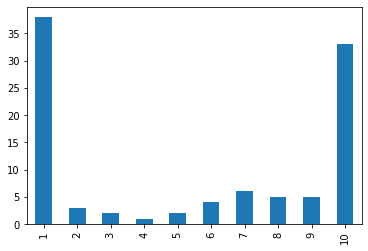

In [ ]:
# Exploratory Graph
fake = pd.Series([38, 3, 2, 1, 2, 4, 6, 5, 5, 33], 
                 index=range(1,11))
fake.plot.bar();

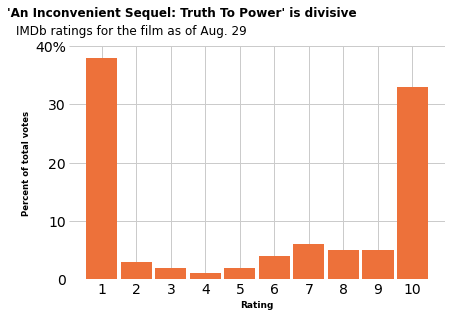

In [ ]:
plt.style.use('fivethirtyeight')

fig, ax = plt.subplots()

# My graph stuff goes in the middle
# figure background color
fig.set_facecolor('white')

# bars on the graph
ax.bar([1,2,3,4,5,6,7,8,9,10], fake, color='#ED713A', width=.9)

# axes background color
ax.set_facecolor('white')

# axis labels
ax.set_xlabel('Rating', fontweight='bold', fontsize=9)
ax.set_ylabel('Percent of total votes', fontweight='bold', fontsize=8.5)

# Graph title
ax.set_title("'An Inconvenient Sequel: Truth To Power' is divisive", fontsize=12, fontweight='bold', x=.3, y=1.1)

# Grph subtitle
# bottom left-hand corner of the lable is located somewhere on the axes
# x and y position refers to the x and y axis
ax.text(s="IMDb ratings for the film as of Aug. 29", x=-1.5, y=42, fontsize=12)

# set ticks (x and y)
ax.set_xticks([1,2,3,4,5,6,7,8,9,10])
ax.set_yticks([0,10,20,30,40])

ax.set_yticklabels([0, 10, 20, 30, '40%'])

# Turn off the spines
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)

plt.show()

# Avoid Misleading Visualizations

Now that we've made a few good graphs, let's talk about some bad ones.

## What makes a visualization misleading?

[5 Ways Writers Use Misleading Graphs To Manipulate You](https://venngage.com/blog/misleading-graphs/)

## Two y-axes

<img src="https://statmodeling.stat.columbia.edu/wp-content/uploads/2015/07/weight_loss.jpg" width="600" />

<img src="https://images.squarespace-cdn.com/content/v1/55b6a6dce4b089e11621d3ed/1454365114450-D22FK1TYZLBB42HNXRDO/ke17ZwdGBToddI8pDm48kDsK5YsbpGZfNSW2QBy5nm97gQa3H78H3Y0txjaiv_0fDoOvxcdMmMKkDsyUqMSsMWxHk725yiiHCCLfrh8O1z5QHyNOqBUUEtDDsRWrJLTmK-rtDVyS8lrwwDyo1SUQ5jl829RLkS7biRysddeTZV4sk9Z7R_TILPNvJ5qwMz15/image-asset.jpeg" width='600' />
 
 Other Examples: 
 - [Spurious Correlations](https://tylervigen.com/spurious-correlations)
 - <https://blog.datawrapper.de/dualaxis/>
 - <https://kieranhealy.org/blog/archives/2016/01/16/two-y-axes/>
 - <http://www.storytellingwithdata.com/blog/2016/2/1/be-gone-dual-y-axis>

##  Y-axis doesn't start at zero.

<img src="https://i.pinimg.com/originals/22/53/a9/2253a944f54bb61f1983bc076ff33cdd.jpg" width="600">

## Pie Charts are bad

<img src="https://i1.wp.com/flowingdata.com/wp-content/uploads/2009/11/Fox-News-pie-chart.png?fit=620%2C465&ssl=1" width="600">

## Pie charts that omit data are extra bad
 
- A guy makes a misleading chart that goes viral

 What does this chart imply at first glance? You don't want your user to have to do a lot of work in order to be able to interpret you graph correctly. You want that first-glance conclusions to be the correct ones.

 <img src="https://pbs.twimg.com/media/DiaiTLHWsAYAEEX?format=jpg&name=medium" width='600'>
 
 <https://twitter.com/michaelbatnick/status/1019680856837849090?lang=en>
 
- It gets picked up by overworked journalists (assuming incompetency before malice)
 
 <https://www.marketwatch.com/story/this-1-chart-puts-mega-techs-trillions-of-market-value-into-eye-popping-perspective-2018-07-18>
 
- Even after the chart's implications have been refuted, it's hard a bad (although compelling) visualization from being passed around.

 <https://www.linkedin.com/pulse/good-bad-pie-charts-karthik-shashidhar/>

**["yea I understand a pie chart was probably not the best choice to present this data."](https://twitter.com/michaelbatnick/status/1037036440494985216)**

## Pie Charts that compare unrelated things are next-level extra bad

<img src="http://www.painting-with-numbers.com/download/document/186/170403+Legalizing+Marijuana+Graph.jpg" width="600">


## Be careful about how you use volume to represent quantities:

radius vs diameter vs volume

<img src="https://static1.squarespace.com/static/5bfc8dbab40b9d7dd9054f41/t/5c32d86e0ebbe80a25873249/1546836082961/5474039-25383714-thumbnail.jpg?format=1500w" width="600">

## Don't cherrypick timelines or specific subsets of your data:

<img src="https://wattsupwiththat.com/wp-content/uploads/2019/02/Figure-1-1.png" width="600">

Look how specifically the writer has selected what years to show in the legend on the right side.

<https://wattsupwiththat.com/2019/02/24/strong-arctic-sea-ice-growth-this-year/>

Try the tool that was used to make the graphic for yourself

<http://nsidc.org/arcticseaicenews/charctic-interactive-sea-ice-graph/>
                                                                                           

## Use Relative units rather than Absolute Units

<img src="https://imgs.xkcd.com/comics/heatmap_2x.png" width="600">

## Avoid 3D graphs unless having the extra dimension is effective

Usually you can Split 3D graphs into multiple 2D graphs

3D graphs that are interactive can be very cool. (See Plotly and Bokeh)

<img src="https://thumbor.forbes.com/thumbor/1280x868/https%3A%2F%2Fblogs-images.forbes.com%2Fthumbnails%2Fblog_1855%2Fpt_1855_811_o.jpg%3Ft%3D1339592470" width="600">

## Don't go against typical conventions

<img src="http://www.callingbullshit.org/twittercards/tools_misleading_axes.png" width="600">

### Links

- [How to Spot Visualization Lies](https://flowingdata.com/2017/02/09/how-to-spot-visualization-lies/)
- [Visual Vocabulary - Vega Edition](http://ft.com/vocabulary)
- [Choosing a Python Visualization Tool flowchart](http://pbpython.com/python-vis-flowchart.html)
- [Searborn example gallery](http://seaborn.pydata.org/examples/index.html) & [tutorial](http://seaborn.pydata.org/tutorial.html)
- [Strong Titles Are The Biggest Bang for Your Buck](http://stephanieevergreen.com/strong-titles/)
- [Remove to improve (the data-ink ratio)](https://www.darkhorseanalytics.com/blog/data-looks-better-naked)
- [How to Generate FiveThirtyEight Graphs in Python](https://www.dataquest.io/blog/making-538-plots/)

#If you really really *really* want more:

## Anatomy of a Matplotlib Plot - How to make **any** symbol or shape on a graph you could possibly want and more.
![Axes vs Axis vs Figure - Matplotlib](https://nbviewer.jupyter.org/github/matplotlib/AnatomyOfMatplotlib/blob/master/images/figure_axes_axis_labeled.png)

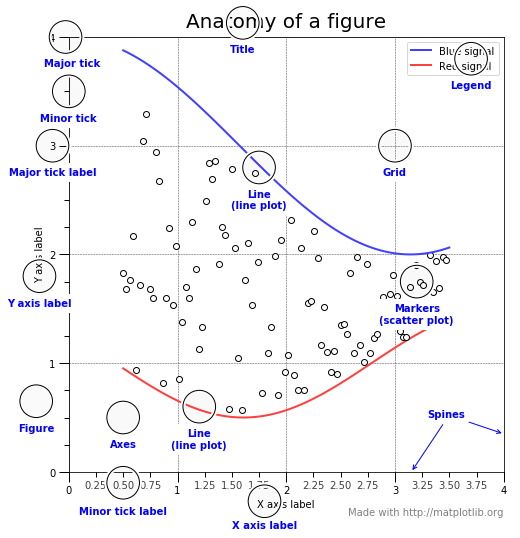

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator, MultipleLocator, FuncFormatter

np.random.seed(19680801)

X = np.linspace(0.5, 3.5, 100)
Y1 = 3+np.cos(X)
Y2 = 1+np.cos(1+X/0.75)/2
Y3 = np.random.uniform(Y1, Y2, len(X))

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1, aspect=1)


def minor_tick(x, pos):
    if not x % 1.0:
        return ""
    return "%.2f" % x

ax.xaxis.set_major_locator(MultipleLocator(1.000))
ax.xaxis.set_minor_locator(AutoMinorLocator(4))
ax.yaxis.set_major_locator(MultipleLocator(1.000))
ax.yaxis.set_minor_locator(AutoMinorLocator(4))
ax.xaxis.set_minor_formatter(FuncFormatter(minor_tick))

ax.set_xlim(0, 4)
ax.set_ylim(0, 4)

ax.tick_params(which='major', width=1.0)
ax.tick_params(which='major', length=10)
ax.tick_params(which='minor', width=1.0, labelsize=10)
ax.tick_params(which='minor', length=5, labelsize=10, labelcolor='0.25')

ax.grid(linestyle="--", linewidth=0.5, color='.25', zorder=-10)

ax.plot(X, Y1, c=(0.25, 0.25, 1.00), lw=2, label="Blue signal", zorder=10)
ax.plot(X, Y2, c=(1.00, 0.25, 0.25), lw=2, label="Red signal")
ax.plot(X, Y3, linewidth=0,
        marker='o', markerfacecolor='w', markeredgecolor='k')

ax.set_title("Anatomy of a figure", fontsize=20, verticalalignment='bottom')
ax.set_xlabel("X axis label")
ax.set_ylabel("Y axis label")

ax.legend()


def circle(x, y, radius=0.15):
    from matplotlib.patches import Circle
    from matplotlib.patheffects import withStroke
    circle = Circle((x, y), radius, clip_on=False, zorder=10, linewidth=1,
                    edgecolor='black', facecolor=(0, 0, 0, .0125),
                    path_effects=[withStroke(linewidth=5, foreground='w')])
    ax.add_artist(circle)


def text(x, y, text):
    ax.text(x, y, text, backgroundcolor="white",
            ha='center', va='top', weight='bold', color='blue')

# Minor tick
circle(0.50, -0.10)
text(0.50, -0.32, "Minor tick label")

# Major tick
circle(-0.03, 4.00)
text(0.03, 3.80, "Major tick")

# Minor tick
circle(0.00, 3.50)
text(0.00, 3.30, "Minor tick")

# Major tick label
circle(-0.15, 3.00)
text(-0.15, 2.80, "Major tick label")

# X Label
circle(1.80, -0.27)
text(1.80, -0.45, "X axis label")

# Y Label
circle(-0.27, 1.80)
text(-0.27, 1.6, "Y axis label")

# Title
circle(1.60, 4.13)
text(1.60, 3.93, "Title")

# Blue plot
circle(1.75, 2.80)
text(1.75, 2.60, "Line\n(line plot)")

# Red plot
circle(1.20, 0.60)
text(1.20, 0.40, "Line\n(line plot)")

# Scatter plot
circle(3.20, 1.75)
text(3.20, 1.55, "Markers\n(scatter plot)")

# Grid
circle(3.00, 3.00)
text(3.00, 2.80, "Grid")

# Legend
circle(3.70, 3.80)
text(3.70, 3.60, "Legend")

# Axes
circle(0.5, 0.5)
text(0.5, 0.3, "Axes")

# Figure
circle(-0.3, 0.65)
text(-0.3, 0.45, "Figure")

color = 'blue'
ax.annotate('Spines', xy=(4.0, 0.35), xytext=(3.3, 0.5),
            weight='bold', color=color,
            arrowprops=dict(arrowstyle='->',
                            connectionstyle="arc3",
                            color=color))

ax.annotate('', xy=(3.15, 0.0), xytext=(3.45, 0.45),
            weight='bold', color=color,
            arrowprops=dict(arrowstyle='->',
                            connectionstyle="arc3",
                            color=color))

ax.text(4.0, -0.4, "Made with http://matplotlib.org",
        fontsize=10, ha="right", color='.5')

plt.show()